# General Radial Flow model 
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pumping test with the Barker (1988) solution.

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

 ## Load the data
The data set for this examples comes from the following reference: 

G. Lods and P. Gouze (2004) WTFM, software for well test analysis in fractured media combining fractional flow with double porosity approaches. Computers and Geosciences. Vol 30. pp. 937-947 Example CS2 and CS3, page 943-944

and

Brixel ...

### Barker Typecurves

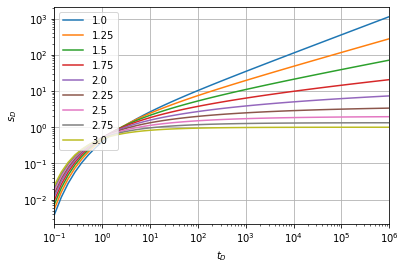

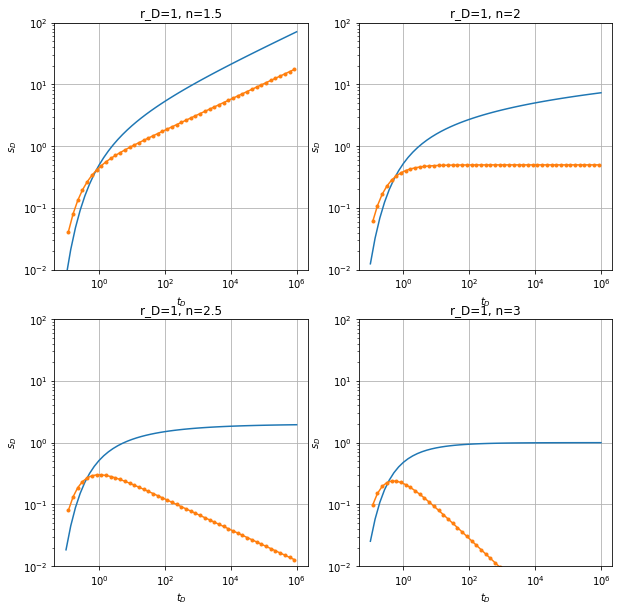

In [2]:
bkr = ht.GRF()
bkr.plot_typecurve()

### Example 1 

For the first example, the data is stored in the ascii file `grf_ds1.txt` that contains two columns as we can see if you edit the data file with your prefered text editor. The first column is the time in seconds. The second column contains the drawdown in meters.

In [3]:
name = ["t","s"]
dtypes = {'t': 'float', 's': 'float'}
data = pd.read_csv('../data/grf_ds1.txt', sep=" ", header = None, names=name, dtype=dtypes)

In order to display the diagnostic plot of the data, we initialize the prepreocessing tool.

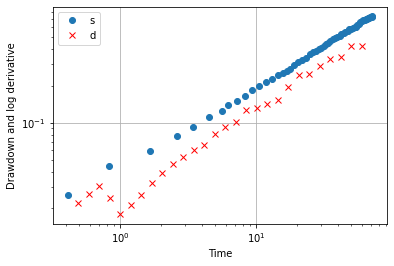

In [4]:
test = ht.preprocessing(df=data)
test.diagnostic()

Let us first compute the time evolution of flow dimension using the flowdim from the preprocessing library.

0.9176904285250157

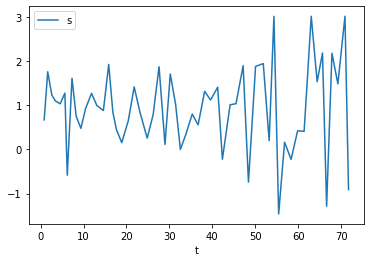

In [5]:
test.fracflowdim(df=data).plot(x='t', y='s')
np.mean(test.dim['s'])

Let us load the GRF model and initialize flow rate, radial distance, borehole radius of pumping well and the data set. Then, we intialize the solution vector using Jacob-Lohman approximation fro the late time.

In [6]:
test=ht.GRF(Q=0.02322, r=26.2, rw=0.1, df=data)
test.guess_params()

[0.8278954540782011, 0.00013841315722710258, 2.0]

The maximum number of function evaluations is exceeded.
Function evaluations 300, initial cost 2.2982e-03, final cost 2.2050e-03, first-order optimality 4.16e+02.


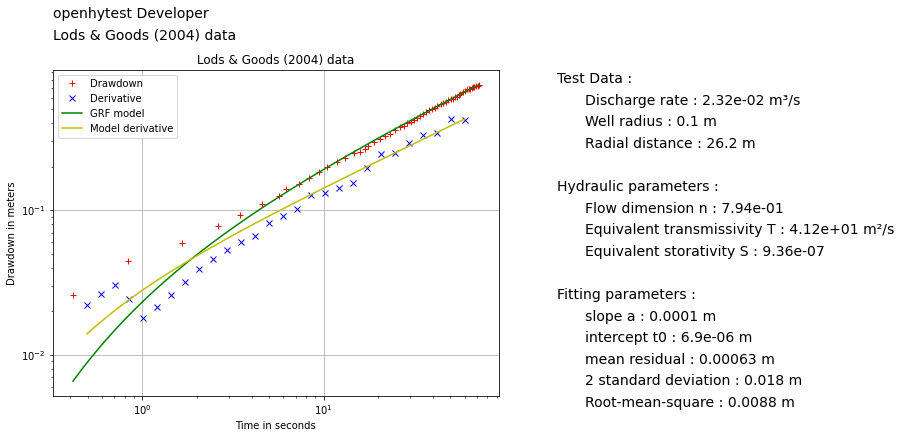

In [8]:
test.rpt(ttle='Lods & Goods (2004) data', author='openhytest Developer', filetype='pdf', reptext='Report_GRF_example1')

The results are in reasonable agreement with the values found by Hamm and Bideaux Model (1994):

skin factor = 6230

flow dimension n = 0.7

Equivalent Cylindrical Transmissivity = 108 m2/s

Equivalent Cylindrical Storativity = 9.17 e-2

K e^(3-n) = 29.0 m^(4-n) s^(-1)

Ss e^(3-n) =2.46 e-2 m^(2-n)

lambda = 4.8e-5

omega = 2.59 e-4

sigma fracture = 5

### Example 2


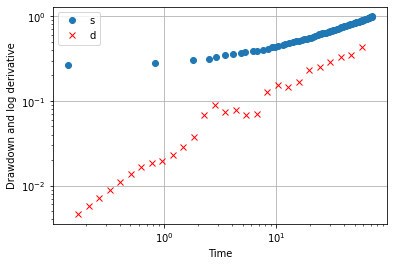

In [2]:
name = ["t","s"]
dtypes = {'t': 'float', 's': 'float'}
data2 = pd.read_csv('../data/grf_ds2.txt', sep=" ", header = None, names=name, dtype=dtypes)
test = ht.preprocessing(df=data2)
test.hyclean()
test.diagnostic()


../openhytest/modelclasses.py:1685: RuntimeWarning: invalid value encountered in power
  return self.rD**(2-n) * (self.rD**2 * pd/4)**(n/4-0.5) * kv(n/2-1, self.rD*np.sqrt(pd)) / pd / gamma(n/2)
../openhytest/modelclasses.py:1685: RuntimeWarning: invalid value encountered in sqrt
  return self.rD**(2-n) * (self.rD**2 * pd/4)**(n/4-0.5) * kv(n/2-1, self.rD*np.sqrt(pd)) / pd / gamma(n/2)


`xtol` termination condition is satisfied.
Function evaluations 42, initial cost 2.9565e-01, final cost 1.1880e-01, first-order optimality 7.48e+03.


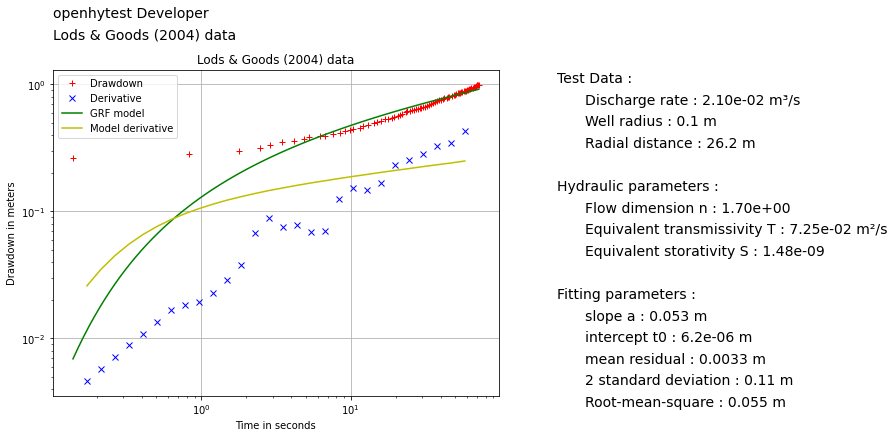

In [3]:
test=ht.GRF(Q=0.021, r=26.2, rw=0.1, df=data2)
test.guess_params()
test.inversion_option = 'stehfest'
test.fitcoeff = 12
test.rpt(ttle='Lods & Goods (2004) data', author='openhytest Developer', filetype='pdf', reptext='Report_GRF_example2')